# Input

$T = (t_{1}, t_{2}, ..., t_{n})$

$n$: One-hot size






In [1]:
import os, sys
import time
import datetime
import pandas as pd
import numpy as np
import math
from math import radians, cos, sin, asin, sqrt 
import random

from scipy.spatial import ConvexHull


ROOTDIR = os.path.abspath(os.path.realpath('./')) + '/Py'

sys.path.append(os.path.join(ROOTDIR, ''))

import dgckernel

import folium

import geopandas as gp

import tensorflow as tf

import argparse

from sklearn.cluster import KMeans

In [2]:
def Get_Sapce(grid_array):
    
    arr_normalized=list()
    
    for arr in grid_array:
        
        arr_normalized+=arr
        
    return list(set(arr_normalized))

        
def Grid_normalize(arr):
    
    arr=arr.replace('[','')

    arr=arr.replace(']','')

    arr=arr.replace("'",'')

    arr=arr.replace(" ",'')

    arr=arr.split(',')
    
    return arr
    
def Encode(arr,One_encode):
    
    encode=[0 for g in One_encode.keys()]
    
    for g in arr:
        
        encode[One_encode[g]]=1
        
    return encode

'''Get batch index'''

def Get_batch(df,batch_size=128):
    
    batch_index=[]
    
    for i in range(batch_size,len(df)+batch_size,batch_size):
        
        batch_index.append(i)
        
    return batch_index

    
   

In [3]:
df = pd.read_csv('./data/train_df.csv',nrows=10000)

df = df.drop(columns='Unnamed: 0')

df['Grids']=df.apply(lambda x:Grid_normalize(x['Grids']),axis=1)

Grid_space=Get_Sapce(list(df['Grids']))

One_encode={Grid_space[i]:i for i in range(len(Grid_space))}

df['Encode']=df.apply(lambda x:Encode(x['Grids'],One_encode),axis=1)


df

,TRIP_ID,POLYLINE,Trajectory,Grids,Encode
0,1372636858620000589,"[[-8.618643,41.141412],[-8.618499,41.141376],[...","[[41.141412, -8.618643], [41.141376, -8.618499...","[OL15F3i3661j24151, OL15F3i3661j24151, OL15F3i...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,1372637303620000596,"[[-8.639847,41.159826],[-8.640351,41.159871],[...","[[41.159826, -8.639847], [41.159871, -8.640351...","[OL15F3i3668j24139, OL15F3i3668j24139, OL15F3i...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,1372636951620000320,"[[-8.612964,41.140359],[-8.613378,41.14035],[-...","[[41.140359, -8.612964], [41.14035, -8.613378]...","[OL15F3i3658j24153, OL15F3i3658j24153, OL15F3i...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,1372636854620000520,"[[-8.574678,41.151951],[-8.574705,41.151942],[...","[[41.151951, -8.574678], [41.151942, -8.574705...","[OL15F3i3643j24158, OL15F3i3643j24158, OL15F3i...","[0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,1372637091620000337,"[[-8.645994,41.18049],[-8.645949,41.180517],[-...","[[41.18049, -8.645994], [41.180517, -8.645949]...","[OL15F3i3669j24130, OL15F3i3669j24130, OL15F3i...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
5,1372636965620000231,"[[-8.615502,41.140674],[-8.614854,41.140926],[...","[[41.140674, -8.615502], [41.140926, -8.614854...","[OL15F3i3659j24152, OL15F3i3659j24152, OL15F3i...","[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ..."
6,1372637210620000456,"[[-8.57952,41.145948],[-8.580942,41.145039],[-...","[[41.145948, -8.57952], [41.145039, -8.580942]...","[OL15F3i3645j24159, OL15F3i3645j24159, OL15F3i...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
7,1372637299620000011,"[[-8.617563,41.146182],[-8.617527,41.145849],[...","[[41.146182, -8.617563], [41.145849, -8.617527...","[OL15F3i3660j24150, OL15F3i3660j24150, OL15F3i...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
8,1372637274620000403,"[[-8.611794,41.140557],[-8.611785,41.140575],[...","[[41.140557, -8.611794], [41.140575, -8.611785...","[OL15F3i3658j24153, OL15F3i3658j24153, OL15F3i...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
9,1372637905620000320,"[[-8.615907,41.140557],[-8.614449,41.141088],[...","[[41.140557, -8.615907], [41.141088, -8.614449...","[OL15F3i3660j24152, OL15F3i3659j24152, OL15F3i...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [4]:
'''Word size'''

len(Grid_space)

6242

## Inference Network
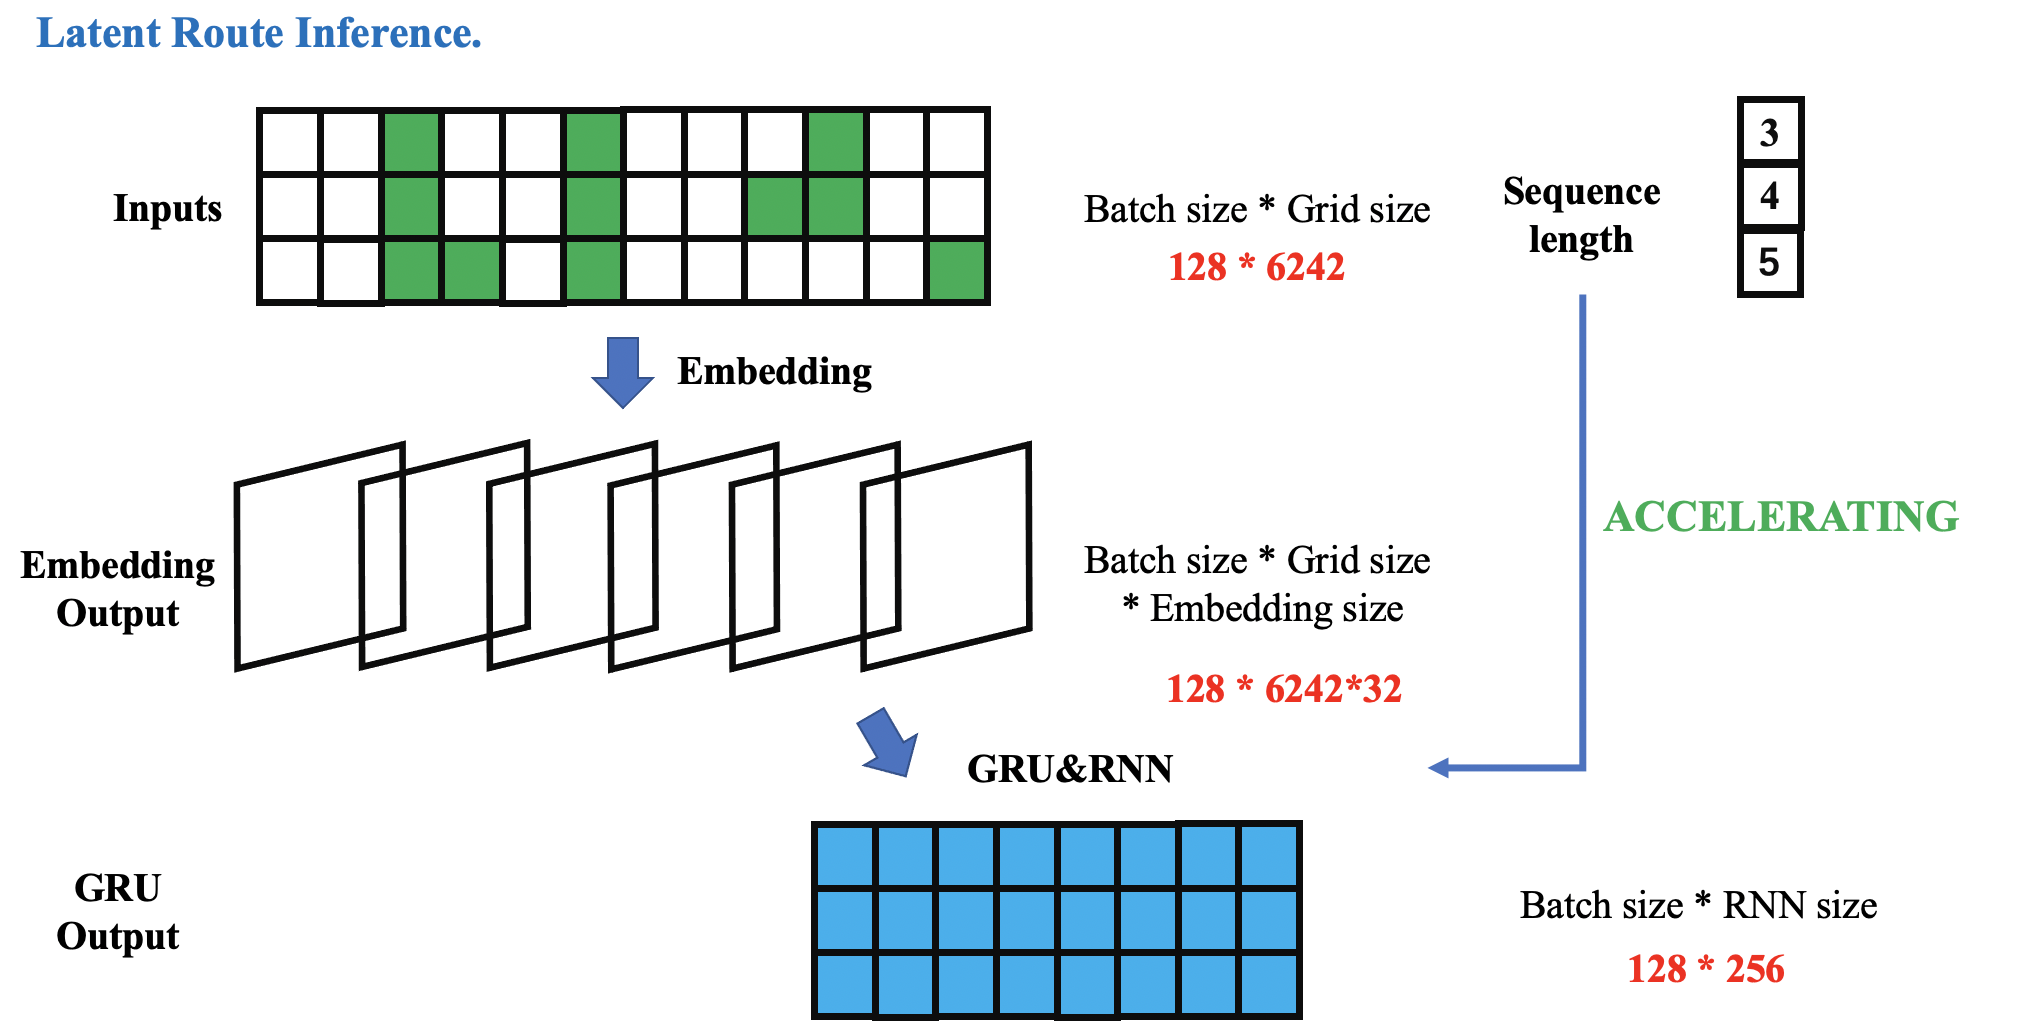

## Latent Route

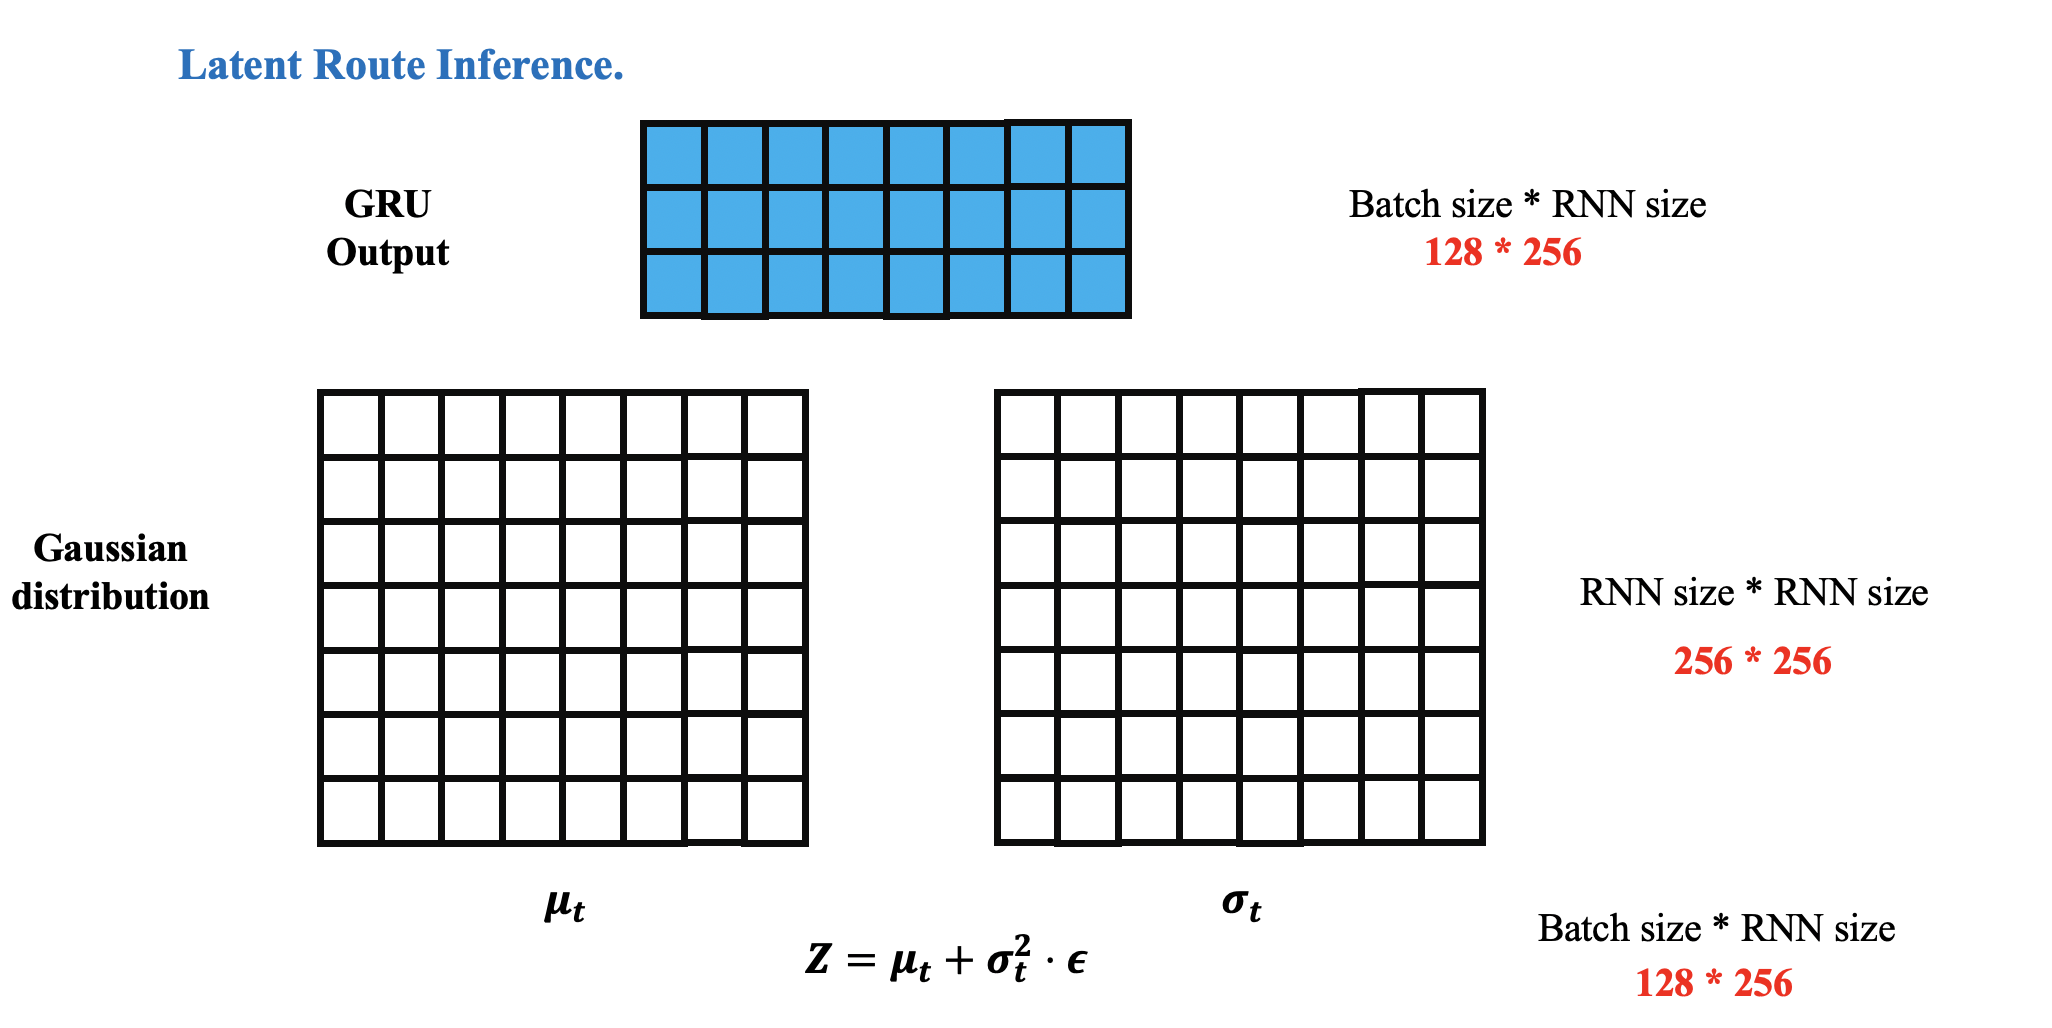

## GMVSA

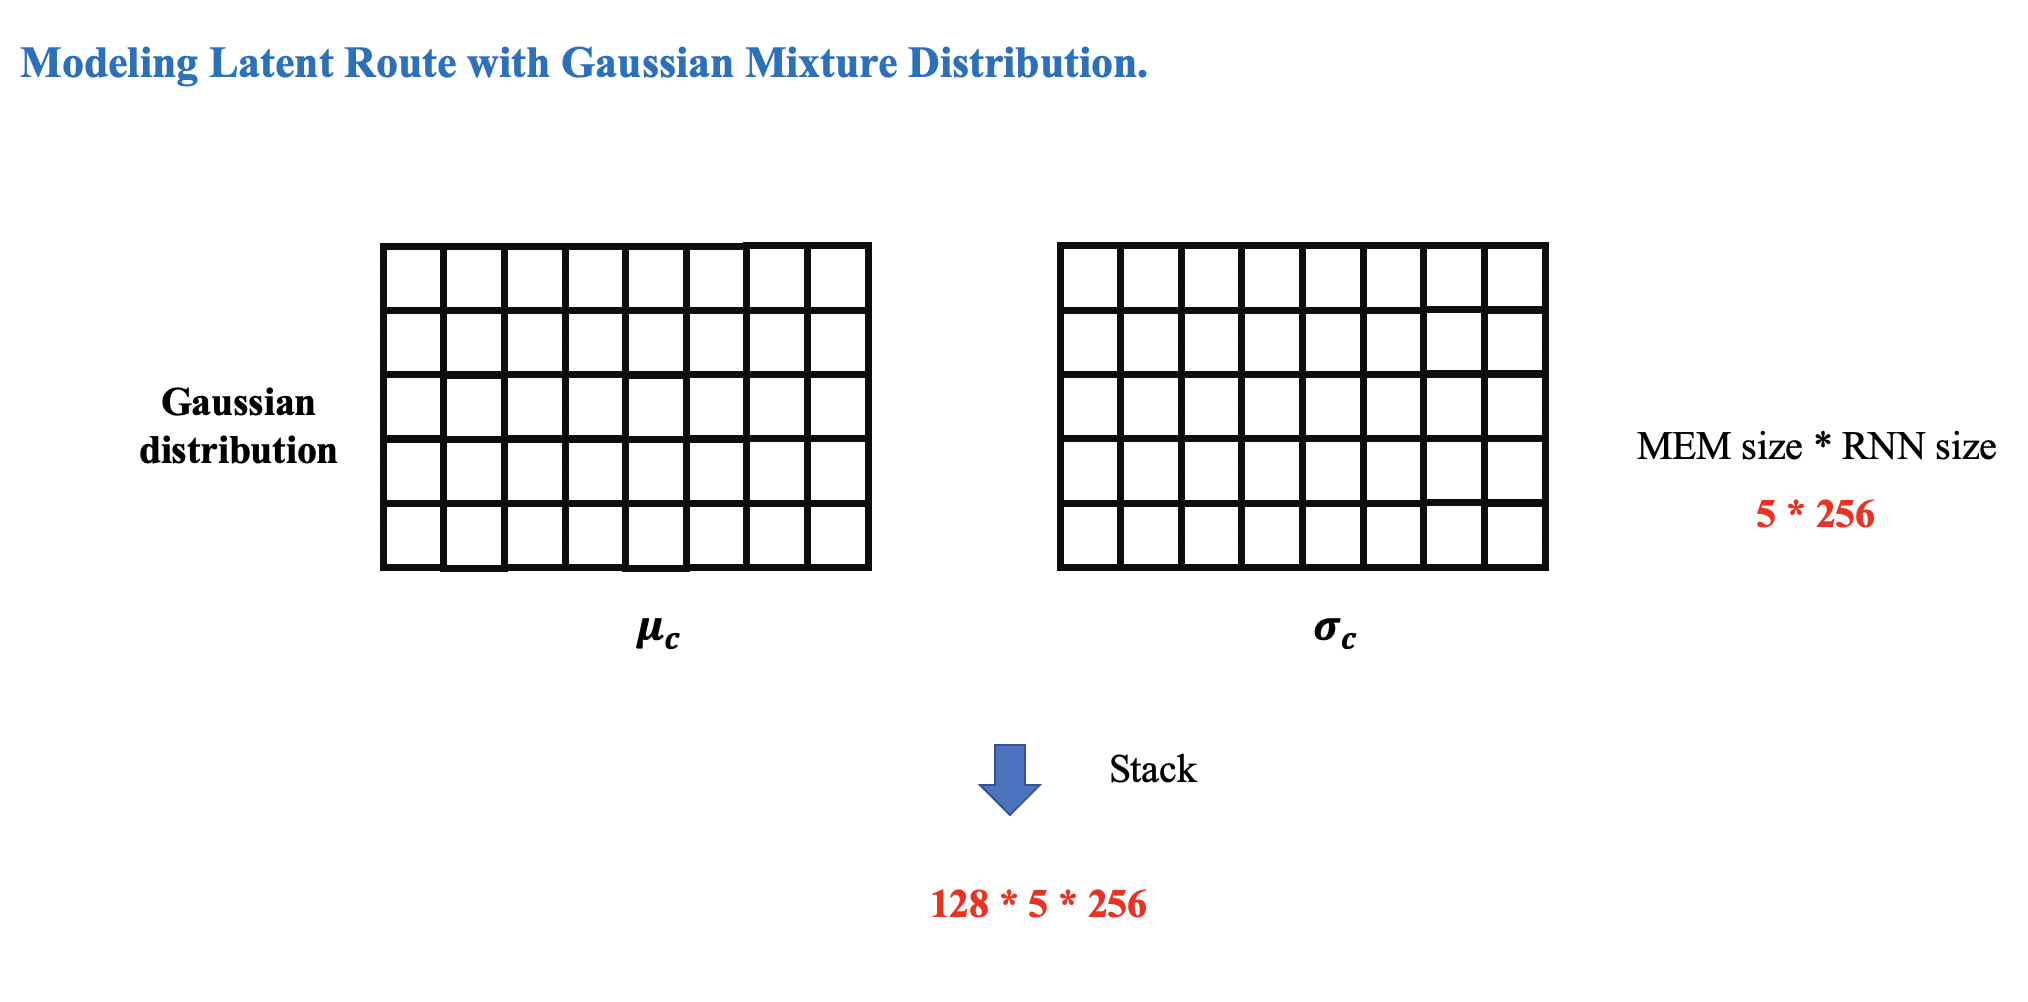

# Generation

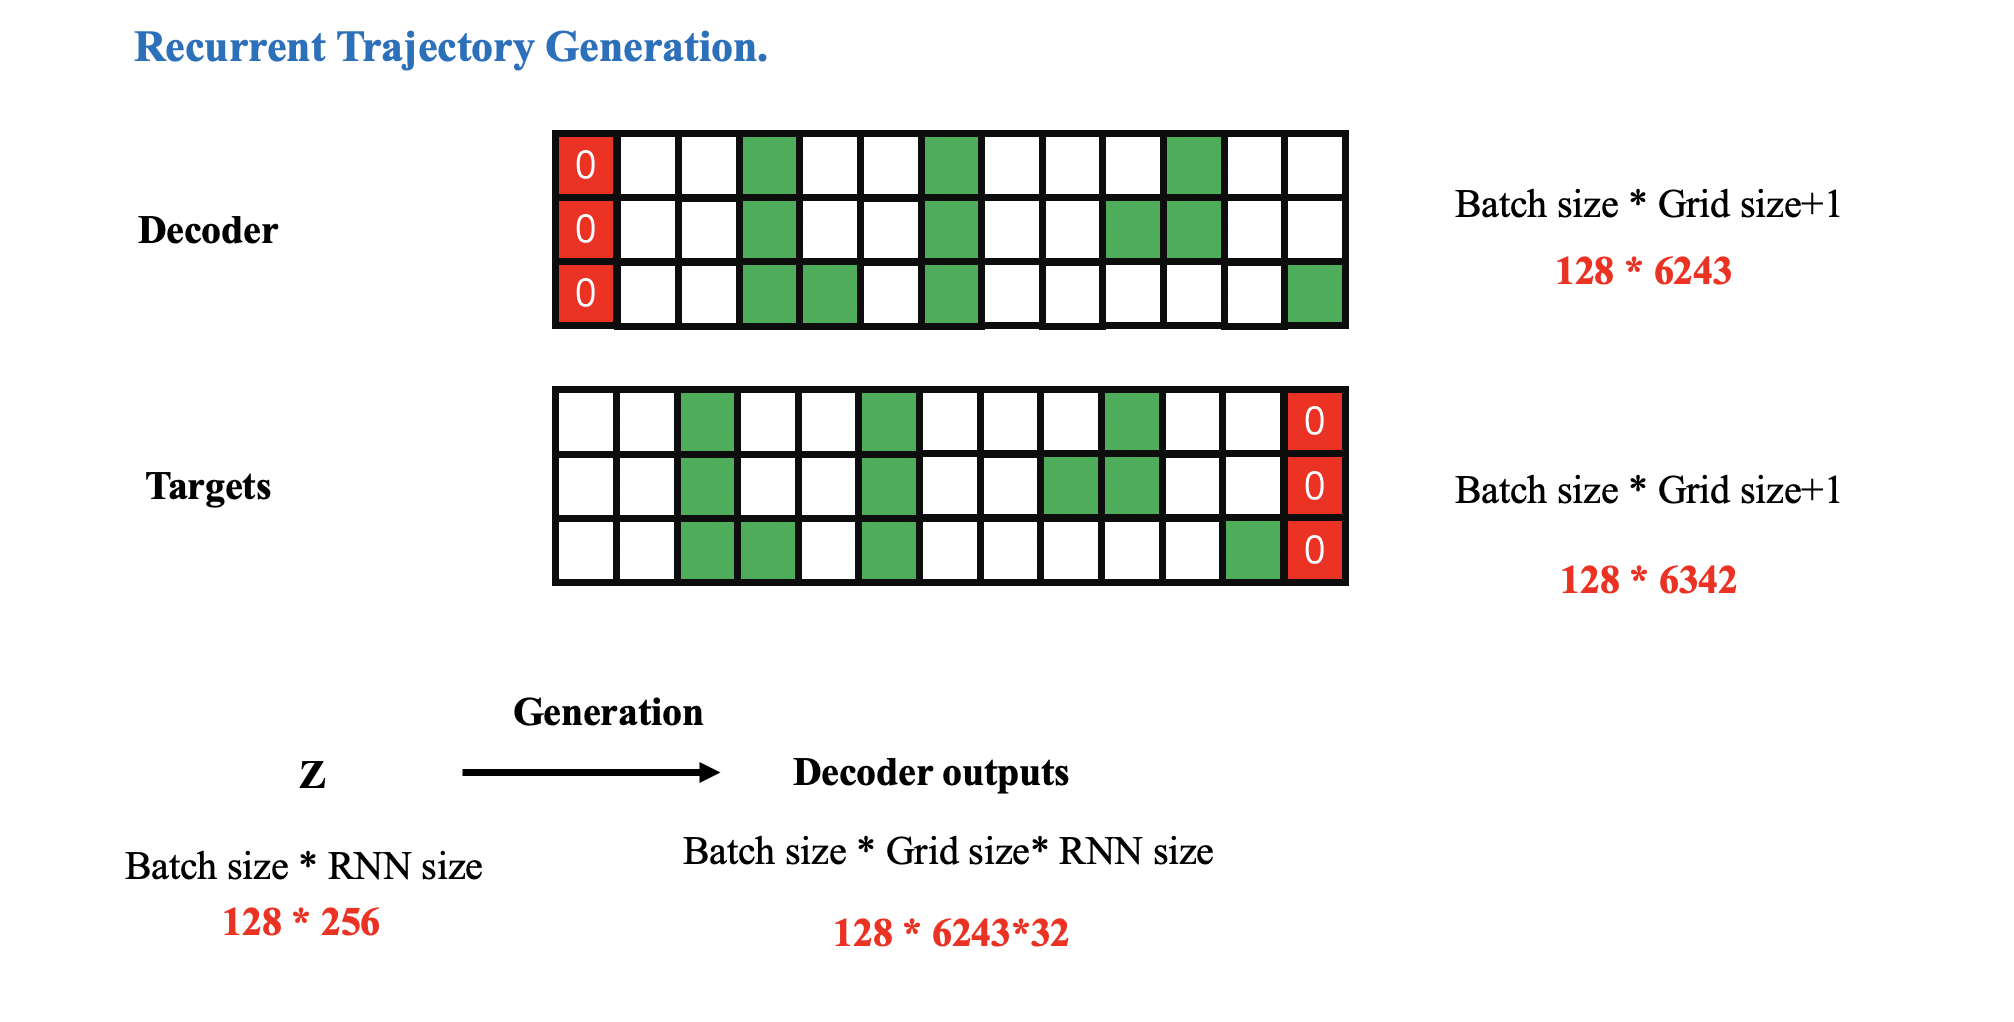


In [5]:
class Detection_Network(object):
    
    def __init__(self):
        
        '''Default parameter'''

        self.Param={}

        '''minibatch size'''

        self.Param['batch_size']=128

        '''size of spatial range'''

        self.Param['grid_size']=6242

        '''size of input embedding'''

        self.Param['x_latent_size']=32

        '''size of RNN hidden state'''

        self.Param['rnn_size']=256
        
        '''size of memory'''
        
        self.Param['mem_num']=5
        
        '''size of negative sampling'''
        
        self.Param['neg_size']=100
        
        '''Learning rate'''
        
        self.Param['learning_rate']=0.001
        
        '''Input'''
        
        self.inputs = tf.placeholder(shape=(self.Param['batch_size'], self.Param['grid_size']), dtype=tf.int32, name='inputs')

        self.seq_length = tf.placeholder(shape=self.Param['batch_size'], dtype=tf.float32, name='seq_length')
        
        '''Decoder'''
        
        self.decoder_inputs = tf.concat([tf.zeros(shape=(self.Param['batch_size'], 1), dtype=tf.int32), self.inputs], axis=1)
        
        self.decoder_targets = tf.concat([self.inputs, tf.zeros(shape=(self.Param['batch_size'], 1), dtype=tf.int32)], axis=1)
        
        '''Emdedding'''
        
        self.Embedding()
        
        '''Inference'''
        
        self.Inference()
        
        '''Cluster'''
        
        self.Cluster()
        
        '''Latent'''
        
        self.Latent()
        
        '''OPT'''
        
        self.Optimization()
        
        '''Saver'''
        
        saver = tf.train.Saver(tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES))
        
        self.save, self.restore = saver.save, saver.restore
        
    def Embedding(self):
        
        '''
        1. One-hot representation\enconding
        
        2. Integer enconding
        
        3. Word embedding - Word2vec
        
        Problems:
        
        1. How to set a proper latent size?
        
        2. Advanced embedding methods?
        
        
        '''
        
        # Input size: batch_size * grid_size, i.e. 128*6242
        
        # Out size: batch_size * grid_size * embedding_size , i.e. 128*6242*32
        
        x_size = out_size = self.Param['grid_size']

        self.embeddings = tf.Variable(tf.random_uniform([x_size, self.Param['x_latent_size']], -1.0, 1.0), dtype=tf.float32)
        
        self.encoder_inputs_embedded = tf.nn.embedding_lookup(self.embeddings, self.inputs)
        
        self.decoder_inputs_embedded = tf.nn.embedding_lookup(self.embeddings, self.decoder_inputs)
        
        
        
    def Inference(self):
        
        '''
        Gate Recurrent Unit cells
        
        '''
        
        # Input size: batch_size * grid_size * embedding_size , i.e. 128*6242*32
        
        # Out size: batch_size * rnn_size , i.e. 128*256
        
        # sequence_length: (optional) An int32/int64 vector sized `[batch_size]`. Used to copy-through state and zero-out outputs when past a batch element's sequence length.  So it's more for performance than correctness.

        with tf.variable_scope("encoder",reuse=tf.AUTO_REUSE):
            encoder_cell = tf.nn.rnn_cell.GRUCell(self.Param['rnn_size'])
            _, self.encoder_final_state = tf.nn.dynamic_rnn(
                encoder_cell,\
                self.encoder_inputs_embedded,\
                sequence_length=self.seq_length,\
                dtype=tf.float32)
            
        '''
        To cope with the possible uncertainties and noise
        
        we infer latent by drawing from a posterior distribution
        
        The function g1(·) is a non-linear function to be learned.
        
        '''
        # Input size: batch_size * rnn_size , i.e. 128*256
        
        # Output size: batch_size * rnn_size , i.e. 128*256
        
        with tf.variable_scope("latent",reuse=tf.AUTO_REUSE):
            
            with tf.variable_scope("mu_z"):
                
                mu_z_w = tf.get_variable("mu_z_w", [self.Param['rnn_size'], self.Param['rnn_size']], tf.float32,
                                         initializer=tf.random_normal_initializer(stddev=0.02))
                
                mu_z_b = tf.get_variable("mu_z_b", [self.Param['rnn_size']], tf.float32,
                                         initializer=tf.constant_initializer(0.0))
                
                self.mu_z = tf.matmul(self.encoder_final_state, mu_z_w) + mu_z_b
                
            with tf.variable_scope("sigma_z"):
                
                sigma_z_w = tf.get_variable("sigma_z_w", [self.Param['rnn_size'], self.Param['rnn_size']], tf.float32,
                                            initializer=tf.random_normal_initializer(stddev=0.02))
                
                sigma_z_b = tf.get_variable("sigma_z_b", [self.Param['rnn_size']], tf.float32,
                                            initializer=tf.constant_initializer(0.0))
                
                self.log_sigma_sq_z = tf.matmul(self.encoder_final_state, sigma_z_w) + sigma_z_b

            eps_z = tf.random_normal(shape=tf.shape(self.log_sigma_sq_z), mean=0, stddev=1, dtype=tf.float32)
            
            self.z = self.mu_z + tf.sqrt(tf.exp(self.log_sigma_sq_z)) * eps_z
            
            self.stack_mu_z = tf.stack([self.mu_z] * self.Param['mem_num'], axis=1)
            
            self.stack_log_sigma_sq_z = tf.stack([self.log_sigma_sq_z] * self.Param['mem_num'], axis=1)
            
            self.batch_post_embedded = self.z
            
    def Cluster(self):
        
        '''
        
        Gaussian mixture distribution
        
        In particular, we first assume there are C different types of routes underlying the trajectory data
        
        C == self.Param['mem_num']
        
        '''
        
        with tf.variable_scope("clusters",reuse=tf.AUTO_REUSE):
            
            '''param of Gaussian'''
            
            mu_c = tf.get_variable("mu_c", [self.Param['mem_num'], self.Param['rnn_size']],
                                   initializer=tf.random_uniform_initializer(0.0, 1.0))
            
            '''param of Gaussian'''
            
            log_sigma_sq_c = tf.get_variable("sigma_sq_c", [self.Param['mem_num'], self.Param['rnn_size']],
                                             initializer=tf.constant_initializer(0.0), trainable=False)
            
            '''param of multinomial'''
            
            log_pi_prior = tf.get_variable("log_pi_prior", self.Param['mem_num'],
                                           initializer=tf.constant_initializer(0.0), trainable=False)
            
            pi_prior = tf.nn.softmax(log_pi_prior)
            
            
            '''Initializing parameters'''

            init_mu_c = tf.placeholder(shape=(self.Param['mem_num'], self.Param['rnn_size']), dtype=tf.float32, name='init_mu_c')
            init_sigma_c = tf.placeholder(shape=(self.Param['mem_num'], self.Param['rnn_size']), dtype=tf.float32, name='init_sigma_c')
            init_pi = tf.placeholder(shape=self.Param['mem_num'], dtype=tf.float32, name='init_pi')
            self.cluster_init = [init_mu_c, init_sigma_c, init_pi]
            
            
            '''assigning'''
            
            self.init_mu_c_op = tf.assign(mu_c, init_mu_c)
            self.init_sigma_c_op = tf.assign(log_sigma_sq_c, init_sigma_c)
            self.init_pi_op = tf.assign(log_pi_prior, init_pi)

            self.mu_c = mu_c
            self.sigma_c = log_sigma_sq_c
            self.pi = pi_prior
            
            
            # Output size: 
            
            # stack_mu_c,stack_log_sigma_sq_c: batch_size * mem_num * rnn_size 
            
            # pi: mem_num

            self.stack_mu_c = tf.stack([mu_c] * self.Param['batch_size'], axis=0)
            
            self.stack_log_sigma_sq_c = tf.stack([log_sigma_sq_c] * self.Param['batch_size'], axis=0)
            
    def Latent(self):
        
        with tf.variable_scope("attention",reuse=tf.AUTO_REUSE):
            
            # Output size: batch_size * mem_num  * rnn_size 
            
            self.stack_z = tf.stack([self.z] * self.Param['mem_num'], axis=1)
            
            # Output size: batch_size * mem_num  
            
            att_logits = - tf.reduce_sum(tf.square(self.stack_z - self.stack_mu_c) / tf.exp(self.stack_log_sigma_sq_c), axis=-1)
            
            att = tf.nn.softmax(att_logits) + 1e-10
            
            self.batch_att = att
            
    def Generation(self,h):
        
        '''Generation Network'''
        
        with tf.variable_scope("Generation", reuse=tf.AUTO_REUSE):
            
            '''Decoder'''
            
            with tf.variable_scope("decoder"):
                
                decoder_init_state = h
                
                decoder_cell = tf.nn.rnn_cell.GRUCell(self.Param['rnn_size'])
                
                self.decoder_outputs, _ = tf.nn.dynamic_rnn(decoder_cell,\
                                                            self.decoder_inputs_embedded,\
                                                            initial_state=decoder_init_state,\
                                                            sequence_length=self.seq_length,\
                                                            dtype=tf.float32)
                
            '''Output'''
            
            with tf.variable_scope("outputs",reuse=tf.AUTO_REUSE):
                
                out_w = tf.get_variable("out_w", [self.Param['grid_size'], self.Param['rnn_size']], tf.float32,
                                        tf.random_normal_initializer(stddev=0.02))
                out_b = tf.get_variable("out_b", [self.Param['grid_size']], tf.float32,
                                        initializer=tf.constant_initializer(0.0))

                batch_rec_loss = tf.reduce_mean(tf.reshape(tf.nn.sampled_softmax_loss(
                                                weights=out_w,
                                                biases=out_b,
                                                labels=tf.reshape(self.decoder_targets, [-1, 1]),
                                                inputs=tf.reshape(self.decoder_outputs, [-1, self.Param['rnn_size']]),
                                                num_sampled=self.Param['neg_size'],
                                                num_classes=self.Param['grid_size']), [self.Param['batch_size'], -1]), axis=-1)

                target_out_w = tf.nn.embedding_lookup(out_w, self.decoder_targets)
                
                target_out_b = tf.nn.embedding_lookup(out_b, self.decoder_targets)

                batch_likelihood = tf.reduce_mean(tf.log_sigmoid(tf.reduce_sum(self.decoder_outputs * target_out_w, -1) + target_out_b), axis=-1, name="batch_likelihood")

                batch_latent_loss = 0.5 * tf.reduce_sum(
                    self.batch_att * tf.reduce_mean(self.stack_log_sigma_sq_c
                                         + tf.exp(self.stack_log_sigma_sq_z) / tf.exp(self.stack_log_sigma_sq_c)
                                         + tf.square(self.stack_mu_z - self.stack_mu_c) / tf.exp(self.stack_log_sigma_sq_c),
                                         axis=-1),
                    axis=-1) - 0.5 * tf.reduce_mean(1 + self.log_sigma_sq_z, axis=-1)
                
                batch_cate_loss = tf.reduce_sum(self.batch_att * (tf.log(self.batch_att)), axis=-1)
                
                self.batch_attbatch_cate_loss = tf.reduce_mean(tf.reduce_mean(self.batch_att, axis=0) * tf.log(tf.reduce_mean(self.batch_att, axis=0)))

            return batch_rec_loss, batch_latent_loss, batch_cate_loss, batch_likelihood
        
    def Optimization(self):
        
        with tf.variable_scope("Optimization",reuse=tf.AUTO_REUSE):
        
            results = self.Generation(self.z)
            
            self.batch_likelihood = results[-1]
            
            self.rec_loss = rec_loss = tf.reduce_mean(results[0])
            
            self.latent_loss = latent_loss = tf.reduce_mean(results[1])
            
            self.cate_loss = cate_loss = results[2]
            
            self.loss = loss = rec_loss + latent_loss + 0.1* cate_loss
            
            self.pretrain_loss = pretrain_loss = rec_loss
            
            self.pretrain_op = tf.train.AdamOptimizer(self.Param['learning_rate']).minimize(pretrain_loss)
            
            self.train_op = tf.train.AdamOptimizer(self.Param['learning_rate']).minimize(loss)


In [8]:
'''Array the Inputs'''

X=np.array([np.array(x) for x in list(df['Encode'])])


def random_batch(X, batch_size, iteration):
    
    start=batch_size*iteration
    end=start+batch_size
    X_batch = X[start:end]
    
    return X_batch

DN=Detection_Network()

all_loss = []


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
This class is equivalent as tf.keras.layers.GRUCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Create a `tf.sparse.SparseTensor` and use `tf.sparse.to_dense` instead.


In [ ]:
Iteration=100

'''Terminate condition'''

threshold=0.001

'''Pre Train'''

with tf.Session() as sess:
    
    sess.run(tf.global_variables_initializer())
    
    ''' Minimize the pretrain_loss'''
    
    for i in range(Iteration):

        X_train = random_batch(X, 128, i)
        
        Seq_train = np.array([list(x).count(1) for x in X_train])
        
        pretrain_loss,_=sess.run([DN.pretrain_loss,DN.pretrain_op],\
                                 feed_dict={DN.inputs:X_train,DN.seq_length:Seq_train})
        
        print('*'*50)

        print('Current batch: ',i)

        print('Loss: ',pretrain_loss)
        
        if i>=1:
            
            if abs(pretrain_loss-pre_loss) <=threshold:
                
                break
        
        pre_loss=pretrain_loss
        
    save_model_name = "./models/pretrain"
    
    DN.save(sess, save_model_name)
        
    x_embedded = []
    
    for i in range(Iteration):
        X_train = random_batch(X, 128, i)
        Seq_train = np.array([list(x).count(1) for x in X_train])
        embedded=sess.run(DN.batch_post_embedded, feed_dict={DN.inputs:X_train,DN.seq_length:Seq_train})
        x_embedded.append(embedded)
        
    x_embedded = np.concatenate(x_embedded, axis=0)
    kmeans = KMeans(n_clusters=5)
    kmeans.fit(x_embedded)
    
    init_mu_c = kmeans.cluster_centers_
    init_sigma_c = np.zeros_like(init_mu_c)
    init_pi = np.zeros(shape=5)
    
    print(init_mu_c,init_sigma_c,init_pi)

    init_feed = dict(zip(DN.cluster_init, [init_mu_c, init_sigma_c, init_pi]))
    
    sess.run([DN.init_mu_c_op, DN.init_sigma_c_op, DN.init_pi_op], init_feed)
    
    save_model_name = "./models/init"
    
    DN.save(sess, save_model_name)

    print("Init model saved.")
    

**************************************************
Current batch:  0
Loss:  8.662743
**************************************************
Current batch:  1
Loss:  8.802261
**************************************************
Current batch:  2
Loss:  8.762499
**************************************************
Current batch:  3
Loss:  8.586924
**************************************************
Current batch:  4
Loss:  8.937168
**************************************************
Current batch:  5
Loss:  8.181632
**************************************************
Current batch:  6
Loss:  8.553921
**************************************************
Current batch:  7
Loss:  8.667483
**************************************************
Current batch:  8
Loss:  8.616917
**************************************************
Current batch:  9
Loss:  8.586358
**************************************************
Current batch:  10
Loss:  8.84328
**************************************************
Current batch:

In [10]:
with tf.Session() as sess:
    
    sess.run(tf.global_variables_initializer())
    
    all_loss = []
    
    model_name = "./models/pretrain"
    
    DN.restore(sess, model_name)

    for i in range(10):

        X_train = random_batch(X, 128, i)
        
        Seq_train = np.array([list(x).count(1) for x in X_train])
        
        rec_loss, cate_loss, latent_loss, _ = sess.run([DN.rec_loss,\
                                                        DN.cate_loss,\
                                                        DN.latent_loss,\
                                                        DN.train_op],\
                                                        feed_dict={DN.inputs:X_train,DN.seq_length:Seq_train})
        
        all_loss.append([rec_loss, cate_loss, latent_loss])
        
        loss = rec_loss + latent_loss + 0.1* cate_loss
        

        print('*'*50)

        print('Current batch: ',i)

        print('Loss: ',np.array(loss).mean())
        
        if i >10:
        
            break

**************************************************
Current batch:  0
Loss:  8.93511
**************************************************
Current batch:  1
Loss:  8.928379
**************************************************
Current batch:  2
Loss:  8.627977
**************************************************
Current batch:  3
Loss:  9.041522
**************************************************
Current batch:  4
Loss:  9.069168
**************************************************
Current batch:  5
Loss:  8.646131
**************************************************
Current batch:  6
Loss:  8.699518
**************************************************
Current batch:  7
Loss:  8.742841
**************************************************
Current batch:  8
Loss:  8.709667
**************************************************
Current batch:  9
Loss:  8.654116
